In [186]:
loan_data=pd.read_csv("data/train.csv")

In [187]:
loan_data

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes          2      Graduate            No   
13   LP001029    Male      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
15   LP001032    Male      No          0      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
18   LP001038    Male     Yes          0  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate           NaN   
20   LP001043    Male     Yes          0  Not Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
22   LP001047    Male     Yes          0  Not Graduate            No   
23   LP001050     NaN     Yes          2  Not Graduate            No   
24   LP001052    Male     Yes          1      Graduate           NaN   
25   LP001066    Male     Yes          0      Graduate           Yes   
26   LP001068    Male     Yes          0      Graduate            No   
27   LP001073    Male     Yes          2  Not Graduate            No   
28   LP001086    Male      No          0  Not Graduate            No   
29   LP001087  Female      No          2      Graduate           NaN   
..        ...     ...     ...        ...           ...           ...   
584  LP002911    Male     Yes          1      Graduate            No   
585  LP002912    Male     Yes          1      Graduate            No   
586  LP002916    Male     Yes          0      Graduate            No   
587  LP002917  Female      No          0  Not Graduate            No   
588  LP002925     NaN      No          0      Graduate            No   
589  LP002926    Male     Yes          2      Graduate           Yes   
590  LP002928    Male     Yes          0      Graduate            No   
591  LP002931    Male     Yes          2      Graduate           Yes   
592  LP002933     NaN      No         3+      Graduate           Yes   
593  LP002936    Male     Yes          0      Graduate            No   
594  LP002938    Male     Yes          0      Graduate           Yes   
595  LP002940    Male      No          0  Not Graduate            No   
596  LP002941    Male     Yes          2  Not Graduate           Yes   
597  LP002943    Male      No        NaN      Graduate            No   
598  LP002945    Male     Yes          0      Graduate           Yes   
599  LP002948    Male     Yes          2      Graduate            No   
600  LP002949  Female      No         3+      Graduate           NaN   
601  LP002950    Male     Yes          0  Not Graduate           NaN   
602  LP002953    Male     Yes         3+      Graduate            No   
603  LP002958    Male      No          0      Graduate            No   
604  LP002959  Female     Yes          1      Graduate            No   
605  LP002960    Male     Yes          0  Not Graduate            No   
606  LP002961    Male     Yes          1      Graduate            No   
607  LP002964    Male     Yes          2  Not 

In [188]:
loan_data.describe

<bound method DataFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Ye

In [5]:
loan_data.columns[loan_data.isnull().any()]

Index([u'Gender', u'Married', u'Dependents', u'Self_Employed', u'LoanAmount',
       u'Loan_Amount_Term', u'Credit_History'],
      dtype='object')

In [6]:
missing_values=loan_data.isnull().sum()/len(loan_data)
missing_values[missing_values>0].sort_values()

Married             0.004886
Gender              0.021173
Loan_Amount_Term    0.022801
Dependents          0.024430
LoanAmount          0.035831
Self_Employed       0.052117
Credit_History      0.081433
dtype: float64

### All columns having missing values have less than 5% data missing, except one which has 8. Not a lot of missing data.

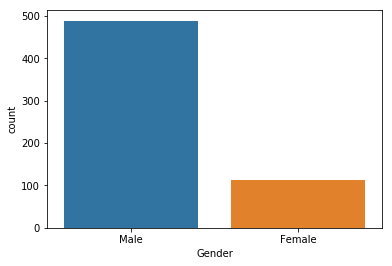

In [7]:
sns.countplot(x='Gender', data=loan_data)

### We notice a major chunk of the candidates are male. Maybe men are more likely to be in debt or does this dataset have more men in it? Not sure. 

In [43]:
loan_data_all=loan_data ## Keep a copy of original data always

In [44]:
loan_data['Credit_History'].fillna(0, inplace=True)

In [55]:
loan_data.columns[loan_data.isnull().any()]

Index([u'Married', u'Dependents', u'LoanAmount', u'Loan_Amount_Term'], dtype='object')

In [46]:
loan_data['Self_Employed'].fillna("No", inplace=True)

In [47]:
import random
    

In [17]:
loan_data['Gender']=loan_data['Gender'].fillna(lambda x: random.choice(df[df["Gender"] != np.nan]["Gender"]))

In [29]:
loan_data['Gender'].value_counts()

Male      500
Female    114
Name: Gender, dtype: int64

In [68]:
loan_data['Gender'].isnull().sum()

13

In [28]:
isnull = loan_data.Gender.isnull()
sample = loan_data.Gender.dropna().sample(isnull.sum(), replace=True).values
loan_data.loc[isnull, 'Gender'] = sample

In [115]:
set(sample)
for x in set(sample):
        print(x)  

Male
Female


In [78]:
T=loan_data.Gender.value_counts()

In [82]:
T.sum()

614

In [85]:
T.values

array([500, 114])

In [32]:
isnull.sum()

13

In [61]:
k=np.random.choice(["hi", "hello", "go"], size=(20,), p=[0.33, 0.33, 0.34])

In [183]:
def replace_with_proportion(frame, column):
    isnull = frame[column].isnull()
    sample = frame[column].dropna()
    sample=set(sample)
    print sample
    sample=set(sample)
    countframe=pd.DataFrame(columns=["name", "count", "proportion"])
    for x in sample:
        countframe.loc[-1] = [x,frame.loc[frame[column] == x].shape[0], 0 ]
        countframe.index = countframe.index + 1
    countframe['proportion']=countframe['count']/countframe['count'].sum()
    to_fill=np.random.choice(countframe['name'], size=(frame[column].isnull().sum(),), p=countframe['proportion'])
    frame.loc[isnull, column] = to_fill
    return frame

In [184]:
K=replace_with_proportion(loan_data, 'Loan_Amount_Term')

set([480.0, 36.0, 360.0, 12.0, 300.0, 240.0, 180.0, 120.0, 84.0, 60.0])
    name  count  proportion
9  480.0   15.0    0.025000
8   36.0    2.0    0.003333
7  360.0  512.0    0.853333
6  300.0   13.0    0.021667
5   12.0    1.0    0.001667
4  240.0    4.0    0.006667
3  180.0   44.0    0.073333
2  120.0    3.0    0.005000
1   84.0    4.0    0.006667
0   60.0    2.0    0.003333


In [ ]:
isnull = df.signup.isnull()
sample = df.signup.dropna().sample(isnull.sum(), replace=True).values
df.loc[isnull, 'signup'] = sample

In [185]:
K['Loan_Amount_Term'].value_counts()

360.0    524
180.0     45
480.0     16
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [181]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [182]:
loan_data['Loan_Amount_Term'].isnull().sum()

14

In [62]:
    isnull = frame[column].isnull()
    sample = frame[column]
    sample=set(sample)
    print frame
    for x in sample:
        frame.loc[frame[column] == x].sum()   

array(['hi', 'go', 'go', 'hello', 'go', 'go', 'hello', 'go', 'hi', 'hi',
       'go', 'hi', 'go', 'hello', 'go', 'hi', 'go', 'hi', 'hi', 'hi'], 
      dtype='|S5')

In [131]:
loan_data['Self_Employed'].dropna().sample(isnull.sum(), replace=True).values

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

In [74]:
isnull

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16      True
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24      True
25     False
26     False
27     False
28     False
29     False
       ...  
584    False
585    False
586    False
587    False
588    False
589    False
590    False
591    False
592    False
593    False
594    False
595    False
596    False
597    False
598    False
599    False
600     True
601    False
602    False
603    False
604    False
605    False
606    False
607    False
608    False
609    False
610    False
611    False
612    False
613    False
Name: Credit_History, Length: 614, dtype: bool

In [148]:
countframe=pd.DataFrame(columns=["name", "count"])


In [152]:
countframe.loc[-1] = [2, 3, ]  # adding a row
countframe.index = countframe.index + 1

In [153]:
countframe

name count
1    2     3
0    2     3

In [160]:
countframe['name'].sum()

4

In [163]:
loan_data['Loan_Amount_Term'].isnull().sum()

14